In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Telecom Customer Churn

* [Tactics](#tactics)
    - [Phone Service](#t1)

In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Checking for null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## EDA

### Graph EDA

In [5]:
def categorical_vs_churn(column):
    """Make bar graphs comparing percent churn to the value of categorical columns.

    Keyword arguments:
    column -- the column to be graphed
    """
    table = df.groupby([column])['Churn'].value_counts().unstack().divide(df.groupby([column])['Churn'].value_counts().unstack().sum(axis=1),axis=0)*100
    table.plot(kind="bar", stacked=True, title=column + ' vs churn',ylabel="Percent churn")
    return table

### Gender vs Churn

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


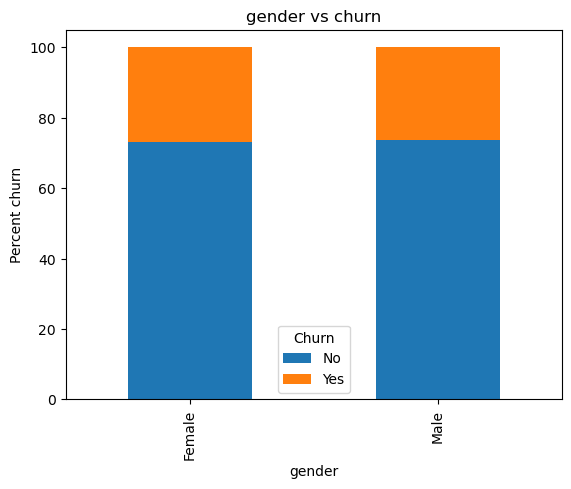

In [6]:
categorical_vs_churn('gender')

The chart does not tell that there is a difference between whether females or males churn more.

### Senior Citizen vs churn

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


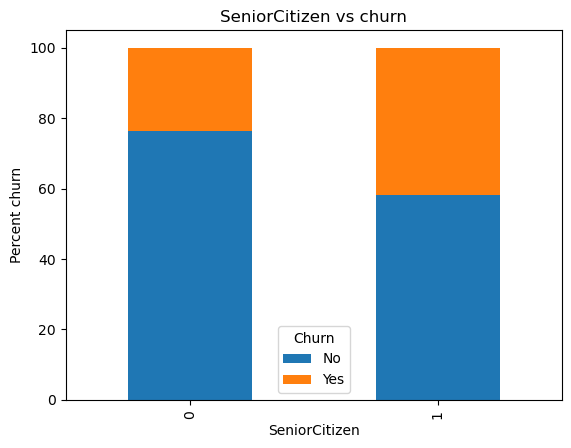

In [7]:
categorical_vs_churn('SeniorCitizen')

The graph shows that senior citizens are more likely to churn.

### Partner vs Churn

Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


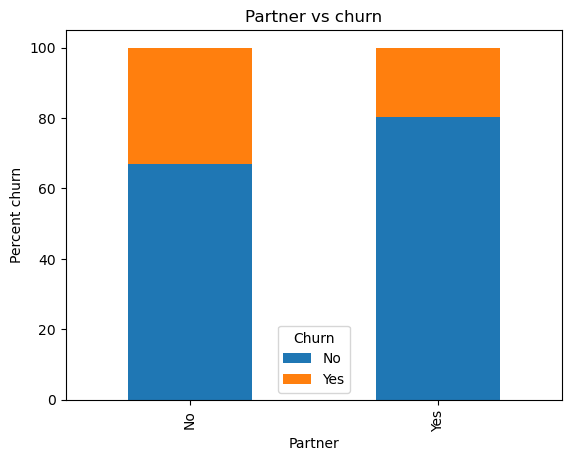

In [8]:
categorical_vs_churn('Partner')

People with a partner are less likely to churn.

### Dependents vs Churn

Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


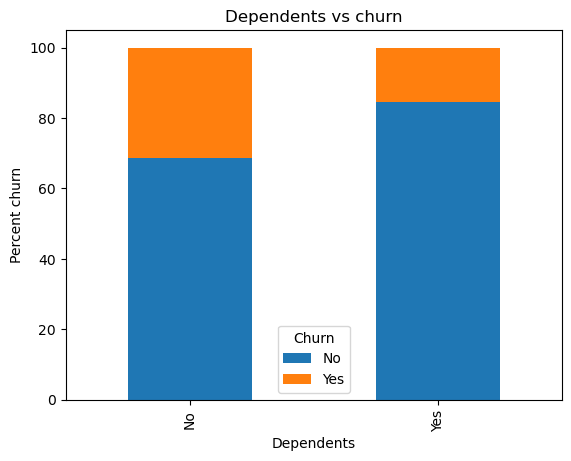

In [9]:
categorical_vs_churn('Dependents')

People with dependents are less likely to churn.

### Tenure vs Churn

In this section, I will calculate the probability that a customer will churn at each tenure level. I will use the formula 
$$ P(churn | tenure = x) = \frac{P(churn \cap tenure = x)}{P(tenure)} $$
for the values x = 0 to 72 months. I will then plot the graph for the correlation between tenure and the probability of churn.

In [10]:
tenure_churn = []
for i in df.tenure.unique():
    tenure_churn.append([i,len(df[(df.tenure == i) & (df.Churn == 'Yes')])/len(df[df.tenure == i])])
tenure_churn_table = pd.DataFrame(tenure_churn, columns=['Tenure', 'Churn probability'])

<AxesSubplot:title={'center':'Tenure vs Churn'}, xlabel='Tenure', ylabel='Churn probability'>

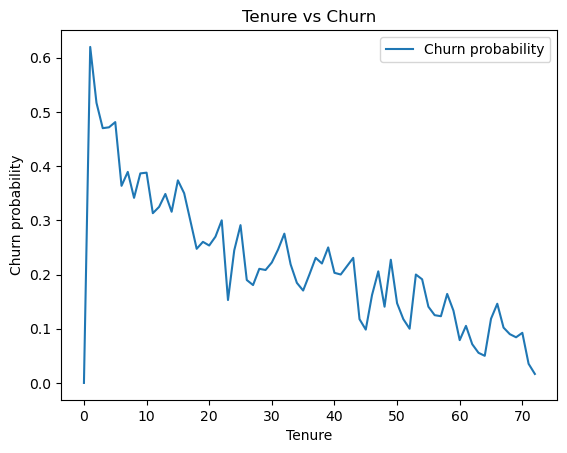

In [11]:
tenure_churn_table.sort_values(by=['Tenure']).plot(x='Tenure',y='Churn probability',title='Tenure vs Churn',ylabel="Churn probability")

As the customer stays with the provider for longer, the probability that it will churn will decrease. However, the probability that it will churn will go back up and then down.

### Phone service vs churn

Churn,No,Yes
PhoneService,,
No,75.073314,24.926686
Yes,73.290363,26.709637


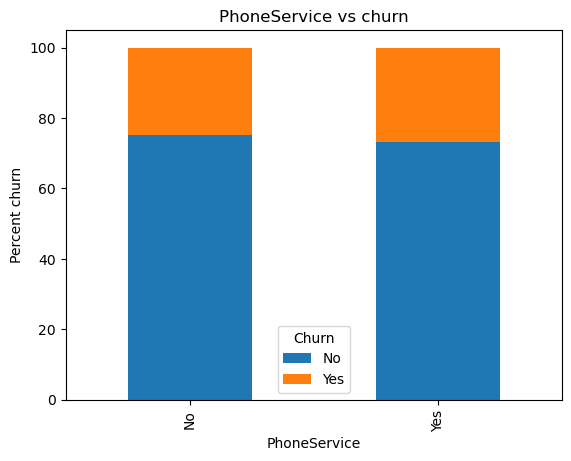

In [12]:
categorical_vs_churn('PhoneService')

I cannot tell whether there is a difference in churn rate between those with phone service and those without phone service.

### Multiple lines vs churn

Churn,No,Yes
MultipleLines,,
No,74.955752,25.044248
No phone service,75.073314,24.926686
Yes,71.390104,28.609896


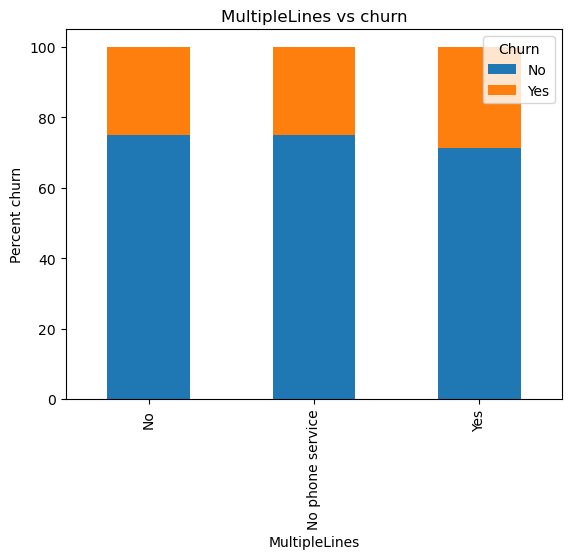

In [13]:
categorical_vs_churn('MultipleLines')

Among those with phone service, those with multiple lines are more likely to churn than those with just one line.

### Internet Service vs Churn

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


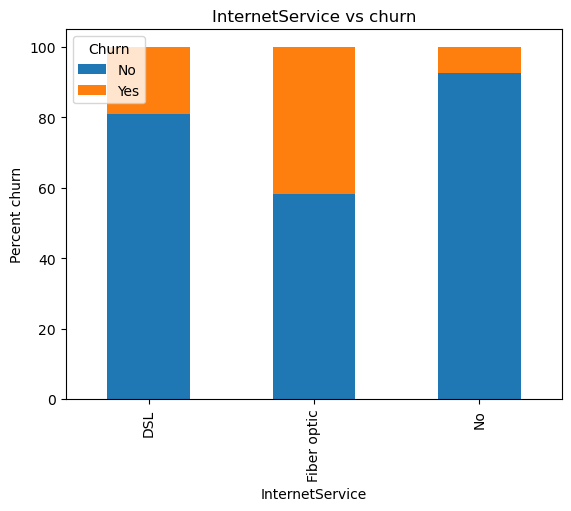

In [14]:
categorical_vs_churn('InternetService')

People with fiber optic are most likely to churn. People with DSL internet are more likely to churn than those with no internet.

### Online Security vs churn

Churn,No,Yes
OnlineSecurity,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


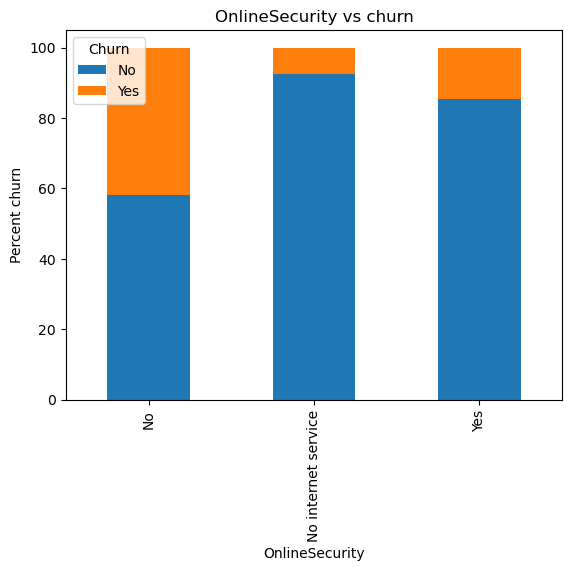

In [15]:
categorical_vs_churn('OnlineSecurity')

Those without online security are more likely to churn.

### Online Backup vs Churn

Churn,No,Yes
OnlineBackup,,
No,60.071244,39.928756
No internet service,92.595020,7.404980
Yes,78.468506,21.531494


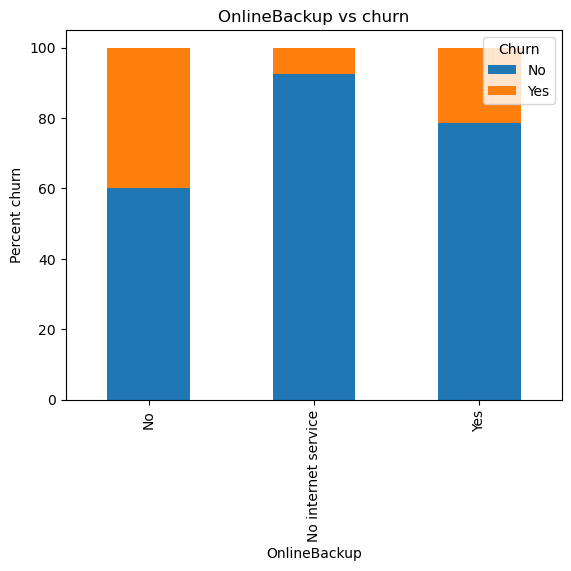

In [16]:
categorical_vs_churn('OnlineBackup')

People without online backup are more likely to churn.

### Device protection vs Churn

Churn,No,Yes
DeviceProtection,,
No,60.872375,39.127625
No internet service,92.595020,7.404980
Yes,77.497936,22.502064


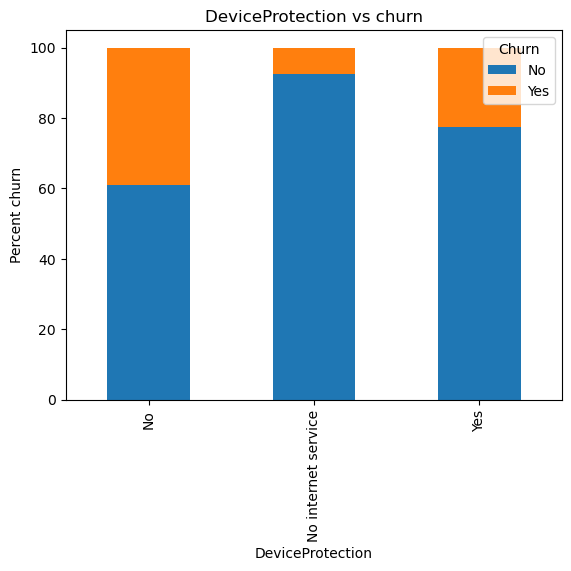

In [17]:
categorical_vs_churn('DeviceProtection')

People without device protection are more likely to churn.

### Tech Support vs Churn

Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


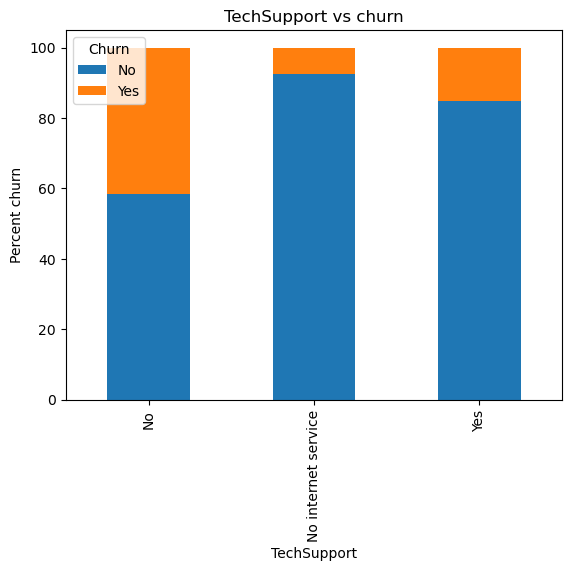

In [18]:
categorical_vs_churn('TechSupport')

People without tech support are more likely to churn.

### Streaming TV vs churn

Churn,No,Yes
StreamingTV,,
No,66.476868,33.523132
No internet service,92.595020,7.404980
Yes,69.929812,30.070188


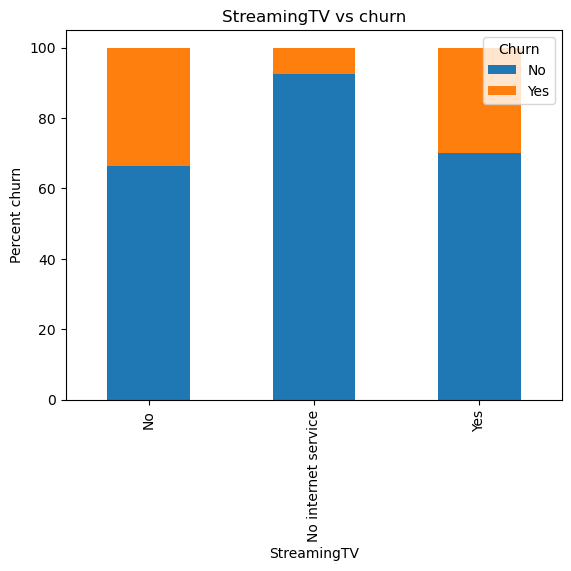

In [19]:
categorical_vs_churn('StreamingTV')

The graph does not show that there is a significant difference between the churn rate of those with streaming TV and those without streaming TV.

### Streaming Movies vs churn

Churn,No,Yes
StreamingMovies,,
No,66.319569,33.680431
No internet service,92.595020,7.404980
Yes,70.058565,29.941435


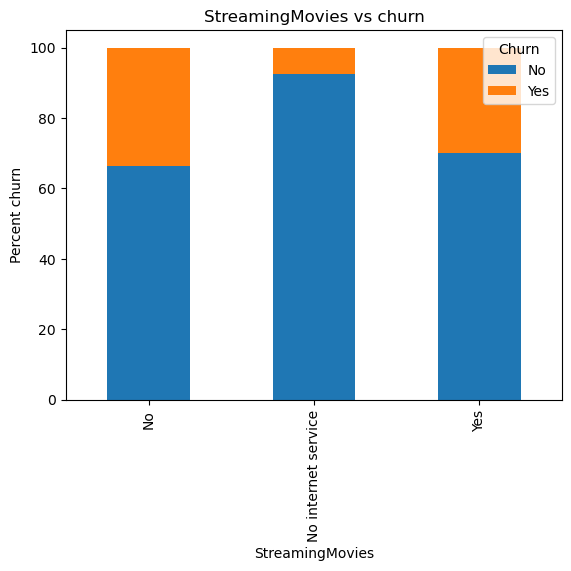

In [20]:
categorical_vs_churn('StreamingMovies')

The graph does not show a significant difference between the churn rate for those with streaming movies and that for those without streaming movies.

### Contract vs Churn

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


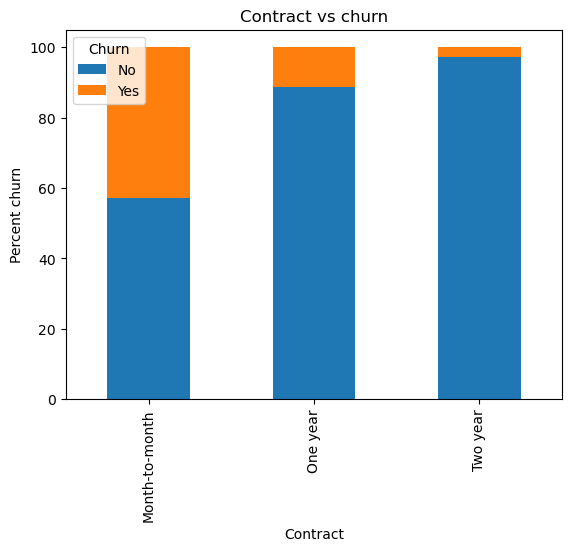

In [21]:
categorical_vs_churn('Contract')

Those with a two tear contract are least likely to churn. Those with a month-to-month contract are most likely to churn.

### Paperless billing vs churn

Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


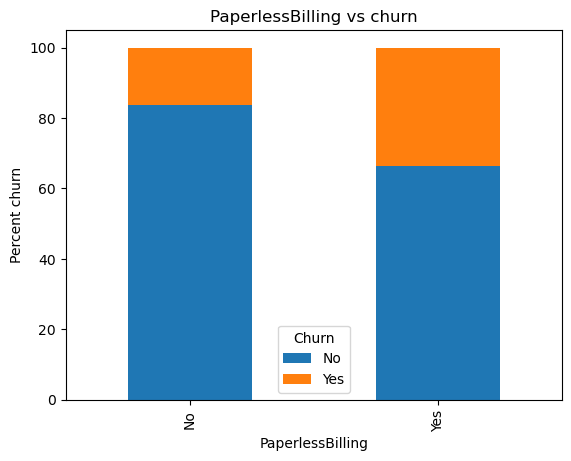

In [22]:
categorical_vs_churn('PaperlessBilling')

People with paperless billing are more likely to churn.

### Payment method vs churn

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


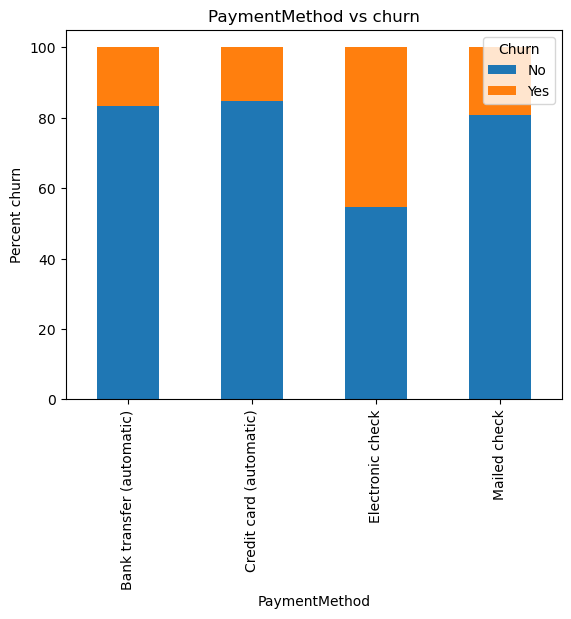

In [23]:
categorical_vs_churn('PaymentMethod')

Those with electronic check are most likely to churn. The churn rate for those with bank transfer, electronic check, and mailed check are similar.

### Monthly Charges vs Churn

In [24]:
mc_churn = []
for i in df.MonthlyCharges.unique():
    mc_churn.append([i,len(df[(df.MonthlyCharges == i) & (df.Churn == 'Yes')])/len(df[df.MonthlyCharges == i])])
mc_table = pd.DataFrame(mc_churn, columns=['Monthly Charges', 'Churn probability'])

I am integer dividing and multiplying the monthly charges column by 10 because I want the lines to not go up and down steeply.

In [25]:
mc_table['Monthly Charges'] = mc_table['Monthly Charges'] // 10

<AxesSubplot:xlabel='Monthly Charges'>

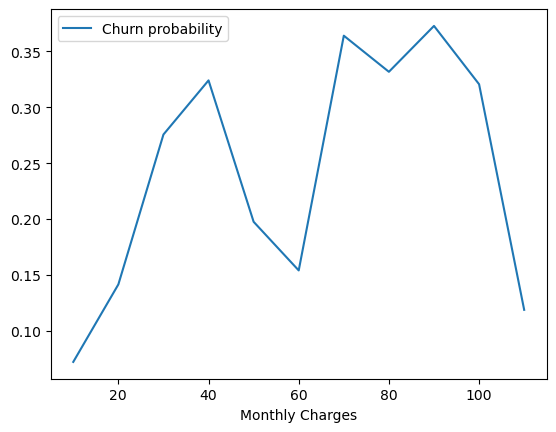

In [26]:
mc_table['Monthly Charges'] = mc_table['Monthly Charges'] * 10
mc_table.groupby('Monthly Charges').mean().plot()

As the monthly charges increase, the probability to churn increases slightly.

### Total Charges vs Churn

In [27]:
df.loc[df.tenure == 0, 'TotalCharges'] = 0 # Make sure that there are no strings in the column.
df['TotalCharges'] = df['TotalCharges'].astype(float) # Convert the column to float.
tc_churn = []
for i in df.TotalCharges.unique(): # See formula for tenure.
    tc_churn.append([i,len(df[(df.TotalCharges == i) & (df.Churn == 'Yes')])/len(df[df.TotalCharges == i])])
tc_table = pd.DataFrame(tc_churn, columns=['Total Charges', 'Churn probability'])

In [28]:
tc_table

,Total Charges,Churn probability
0,29.85,0.0
1,1889.50,0.0
2,108.15,1.0
3,1840.75,0.0
4,151.65,1.0
...,...,...
6526,1990.50,0.0
6527,7362.90,0.0
6528,346.45,0.0
6529,306.60,1.0


In this section, I am integer diving and multiplying the total charges column by 1000 because the graph would otherwise have a y-value of either 0 or 1 for each x-value.

<AxesSubplot:xlabel='Total Charges'>

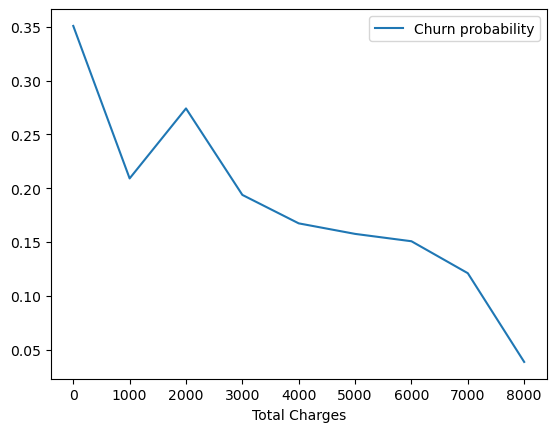

In [29]:
tc_table['Total Charges'] = tc_table['Total Charges'].astype(float)
tc_table['Total Charges'] = tc_table['Total Charges'] // 1000
tc_table['Total Charges'] = tc_table['Total Charges'] * 1000
tc_table.groupby('Total Charges').mean().plot()

As the total charges increase, the probability of churning decreases. This is likely caused by the increase in tenure.

### Hypothesis testing to determine important variables

I am performing hypothesis tests for each variable because graph EDA does not tell which are the important variables.

In [30]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

I am performing a chi-square test on each categorical column vs churn.

In [31]:
from scipy.stats import chi2_contingency
for i in df.columns:
    c, p, dof, expected = chi2_contingency(pd.crosstab(df[i], df['Churn']))
    if p < .05:
        print(i , p)

SeniorCitizen 1.510066805092378e-36
Partner 2.1399113440759935e-36
Dependents 4.9249216612154196e-43
tenure 1.2807811055496877e-176
MultipleLines 0.0034643829548773
InternetService 9.571788222840544e-160
OnlineSecurity 2.661149635176552e-185
OnlineBackup 2.0797592160864276e-131
DeviceProtection 5.505219496457244e-122
TechSupport 1.4430840279998987e-180
StreamingTV 5.528994485739183e-82
StreamingMovies 2.667756755723681e-82
Contract 5.863038300673391e-258
PaperlessBilling 4.073354668665985e-58
PaymentMethod 3.6823546520097993e-140
MonthlyCharges 1.8852727784255517e-18
Churn 0.0


## Feature Engineering

### Changing categorical variables to 1's and 0's

In [32]:
df['Female'] = pd.Series(np.where(df.gender.values == 'Female', 1, 0),df.index)
df = df.drop('gender',axis=1)

### Converting yes and no.

In [33]:
for i in ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']:
    df[i] = df[i].map({'Yes': 1, 'No': 0})

In [34]:
df = df.fillna(0)

### One-hot encoding with non-binary categorical columns

In [35]:
df = df.join(pd.get_dummies(df['InternetService'],prefix='InternetService').drop('InternetService_No',axis=1))
df=df.drop('InternetService',axis=1)

In [36]:
df = df.join(pd.get_dummies(df['PaymentMethod'],prefix='PaymentMethod'))
df = df.join(pd.get_dummies(df['Contract'],prefix='Contract'))
df=df.drop(['PaymentMethod','Contract'],axis=1)

### Removing multicollinearity

There are columns that are the results of performing operations on other columns. For example, the monthly charges column is created by multiplying the price of each service by the number of services. The total charges column is the monthly charges multiplied by the tenure.

In [37]:
df[df.columns[5:-7]].drop(['PaperlessBilling','MonthlyCharges','TotalCharges','Churn','Female'],axis=1)

,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_Fiber optic
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0
2,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0
3,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,0
7039,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0,1
7040,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
7041,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


#### Modeling the monthly charges.

In [38]:
import statsmodels.api as sm 
sX = df[df.columns[5:-7]].drop(['PaperlessBilling','MonthlyCharges','TotalCharges','Churn','Female'],axis=1)
sy = df.MonthlyCharges
model = sm.OLS(sy, sX)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         MonthlyCharges   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.413e+06
Date:                Sun, 26 Mar 2023   Prob (F-statistic):                        0.00
Time:                        01:38:24   Log-Likelihood:                         -10167.
No. Observations:                7043   AIC:                                  2.035e+04
Df Residuals:                    7033   BIC:                                  2.042e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

According to this chart, the monthly prices of the services are the following:
* phone service: 20
* multiple lines: 5
* online security: 5
* online backup: 5
* device protection: 5
* tech support: 5
* streaming TV: 10
* streaming movies: 10
* DSL internet: 25
* fiber internet: 50 
$\newline$
Because the p-value of the above model is less than $\alpha$=0.05, I can conclude that there is a linear relationship between all the services and the monthly charges.

#### Modeling the total charges.

Now I can find whether there is a relationship between the total charges.

In [39]:
from statsmodels.formula.api import ols
GLMmodel = ols("TotalCharges ~  MonthlyCharges: tenure"  , data = df)
res = GLMmodel.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           TotalCharges   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.006e+06
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:38:25   Log-Likelihood:                -39627.
No. Observations:                7043   AIC:                         7.926e+04
Df Residuals:                    7041   BIC:                         7.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.92

Since the p-value for this model is less than $\alpha$=0.05, I can conclude that the formula for total charges is monthly charges multiplied by tenure.

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
X = df[df.columns[5:-7]].drop(['PaperlessBilling','MonthlyCharges','TotalCharges','Churn','Female'],axis=1)
for i in range(len(np.where(X.corr() > .6)[0])):
    if np.where(X.corr() > .6)[0][i] != np.where(X.corr() > .6)[1][i]:
        print(X.corr().columns[np.where(X.corr() > .6)[1][i]],X.corr().columns[np.where(X.corr() > .6)[0][i]])

Now I can use the variance inflation factor to calculate which columns are correlated with each other.

In [41]:

vif = [[var,variance_inflation_factor(X.values, X.columns.get_loc(var))] for var in X.columns]
len(X[np.array(list(filter(lambda x: x[1] < 5, vif)))[:,0]].columns)

10

In [42]:
len(X.columns)

10

It seems like none of the columns are correlated with each other, so I can use all of them in the model.

## Predicting customer churn

### Logistic Regression

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(df[df.columns[6:-7]])
pd.DataFrame(X_train_encoded,columns=encoder.get_feature_names_out(df[df.columns[6:-7]].columns))
pipe = Pipeline(steps =[
    ('tf1', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('model', RandomForestRegressor(n_estimators = 200)),
# or LinearRegression, SVR, DecisionTreeRegressor, etc
])
X_train = pd.DataFrame(X_train_encoded,columns=encoder.get_feature_names_out(df[df.columns[6:-7]].columns))
y_train = df.Churn.eq('Yes').mul(1)
cross_val_score(pipe, X_train, y_train, cv = 5)

array([1., 1., 1., 1., 1.])

In [44]:
pipe.fit(X_train,y_train)
pipe.predict(X_train)

array([0., 0., 0., ..., 0., 0., 0.])

## Now to implement the tactics

The original questions asked in the beginning of the notebook is how to increase the revenue of a company. To do that, I will have to find out which features lead to churn. For that, I will have to look at which services are causing churn. If a feature has a high feature importance, then it is leading to churn. If a feature has low feature importance, then a lack of it leads to churn. 

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,df.Churn)
feature_importance = pd.DataFrame(np.array([X.columns,lr.coef_[0]]).T).sort_values(1)
keep = X.columns
feature_importance[feature_importance[0].str.contains('|'.join(keep))]
feature_importance.columns = ['feature','importance']
feature_importance

,feature,importance
2,OnlineSecurity,-0.939468
5,TechSupport,-0.849165
3,OnlineBackup,-0.599283
4,DeviceProtection,-0.483429
0,PhoneService,-0.355954
1,MultipleLines,-0.138677
6,StreamingTV,0.04501
7,StreamingMovies,0.045122
8,InternetService_DSL,1.977344
9,InternetService_Fiber optic,3.038483


A lower feature importance value means that the increasing that variable leads to decreasing the target variable. In this case, it means including this variable leads to decreasing the churn. Phone service, a two-year contract, and online security have the lowest feature importance values. Whereas, fiber optic, a month-to-month contract, and paperless billing have the highest feature values. This means that these features are the most related to churn. 

While there is no one-size-fits-all approach to reducing churn in the telecom industry, some of the factors mentioned above can have an impact on customer retention.

For example, offering a two-year contract can help lock in customers and prevent them from churning to other providers. Providing tech support and online security can also help customers feel more secure and satisfied with their service, leading to lower churn rates and thus, more revenue for the company.

On the other hand, offering a month-to-month contract may make it easier for customers to switch providers if they find a better deal elsewhere. Additionally, paperless billing and multiple lines may not be enough to retain customers if they are not satisfied with the overall quality of the service or if they have had negative experiences with customer support.

Ultimately, reducing churn in the telecom industry requires a customer-centric approach that focuses on understanding customers' needs and preferences, providing high-quality service, and continuously improving the customer experience. This may involve offering flexible contracts, investing in network quality and infrastructure, providing excellent customer support, and offering competitive pricing and promotions that meet customers' evolving needs.

# Tactics
<a id = "tactics"></a>

To show how much including a service will increase revenue, I will have to predict the model with the customers who have churned and lack that service. I will have to find the sum of the monthly charges of those who will have not churned if the service was present but have churned because the service is absent.

In [46]:
def show_profit_of_tactic(df,col):
    """
    Take a column and show how much including that service will increase the revenue of the company.
    """
    X = df[(df[col]== 0) & (df.Churn == 1)].drop(['Churn','MonthlyCharges'],axis=1) 
    y = lr.predict(X)
    dft = X
    dft['y'] = y
    dft['MonthlyCharges'] = df[(df[col]== 0) & (df.Churn == 1)].MonthlyCharges
    return sum(dft[dft.y == 0].MonthlyCharges)

### Tactic 1
<a id = "t1"></a>

I will try modeling the revenue when phone service is included for those without phone service.

In [47]:
df = df[['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'InternetService_DSL', 'InternetService_Fiber optic','Churn','MonthlyCharges']]

In [48]:
show_profit_of_tactic(df,'PhoneService')

6380.749999999998

The company can gain $3,356.64 from adding phone service.

## Tactic 2

In this section, I will be modeling whether adding tech support will lead to an increase in revenue.

In [49]:
show_profit_of_tactic(df,'TechSupport')

53975.85000000003

The company will gain $36,905 from adding tech support.

### Services

In [50]:
df.columns

Index(['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'InternetService_DSL', 'InternetService_Fiber optic', 'Churn',
       'MonthlyCharges'],
      dtype='object')

This dataframe will show including which services will lead to the most revenue increase.

In [51]:
services = ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','InternetService_DSL','InternetService_Fiber optic']
revenue = pd.DataFrame(columns=['Service','Profit'])
for i in services:
    revenue.loc[len(revenue.index)] = [i,show_profit_of_tactic(df,i)] 
revenue.sort_values('Profit',ascending=False)

,Service,Profit
8,InternetService_DSL,57566.10
2,OnlineSecurity,56028.80
5,TechSupport,53975.85
4,DeviceProtection,45295.55
3,OnlineBackup,37701.95
7,StreamingMovies,37107.20
6,StreamingTV,35911.50
1,MultipleLines,34987.35
9,InternetService_Fiber optic,24830.80
0,PhoneService,6380.75


Adding online security leads to the highest profit, followed by DSL internet service, tech support, and device protection.

In [52]:
sum(revenue.Profit)

389785.8500000003

Including all of the services leads the company to increase their revenue by $397,047.